<a href="https://colab.research.google.com/github/dohyun93/hongong_mldl/blob/main/7_3_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EB%AA%A8%EB%8D%B8_%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 머신러닝 알고리즘 대비 딥러닝 에서는 인공신경망에 대한 다양한 하이퍼파라미터들을 프로그래머가 변경하면서
# 인공지능 모델을 개발하는 차이가 있다. 머신러닝은 다소 알고리즘에 대해 가변적으로 프로그래머가 모델을 변형하는 부분이 제약적이다.

# 손실 곡선
# fit() 실행 후 결과로 <tensorflow.python.keras.callbacks.History at 0x78asdfjlaskdj> 가 출력되었다.
# 이는 History 클래스 객체로, 훈련과정에서 계산한 지표, 즉 손실과 정확도 값이 저장되어 있다.

# 이 값을 이용해 그래프를 그려보자.

# 1. fashion mnist dataset load and set train/validation set.
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_input, train_target, random_state=42, test_size=0.2)

# 2. 모델을 만드는 함수를 만든다.
# a_layer 매개변수로 전달되는 kears.layers 객체가 있다면 100개 뉴런의 첫 번째 은닉층 뒤에 해당 레이어를 추가한다.
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

model = model_fn()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 위 함수로 만든 모델을 훈련시켜보자.
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)
# verbose=0 : 훈련과정 출력을 조절한다. 기본은 1로, 매 에포크마다 진행막대와 손실 등의 지표를 출력하나, 
# 0으로 설정할 경우 훈련과정을 나타내지 않는다.

In [ ]:
# 위 History 객체 'history'에는 훈련 측정값이 담겨있는 history 딕셔너리가 있다. 이를 출력해보자.
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


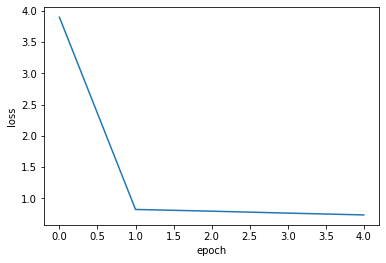

In [ ]:
# 손실과 정확도가 존재하는걸 알 수 있다.
# 손실과 compile에서 metrics 매개변수로 전달한 'Accuracy' 값이 매 에포크에 대해서 저장되어 있다.
# 이를 시각화 해보자.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

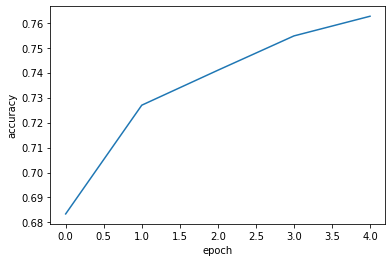

In [ ]:
# accuracy 를 시각화 해보자.
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

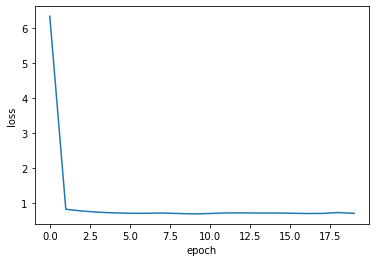

In [ ]:
# 에포크를 20으로 늘려서 훈련시켜보고 손실을 시각화 해보자.
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 검증 손실

> 에포크에 따른 과대/과소 적합을 판단하려면 검증 세트에 대해서도 손실을 시각화 해야한다.

In [18]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
# fit() 인자로 검증세트에 대한 데이터도 넘겨준다.
history = model.fit(train_scaled, train_target, verbose=0, epochs=20, validation_data=(val_scaled, val_target))

print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


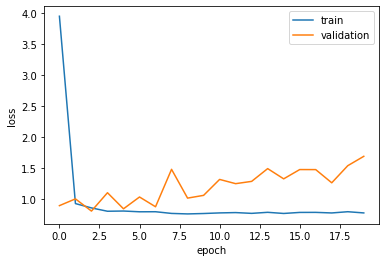

In [20]:
# loss, accuracy 외에 val_loss, val_accuracy 라는 검증세트의 손실, 정확도가 존재한다.
# 이들을 시각화해보자.

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

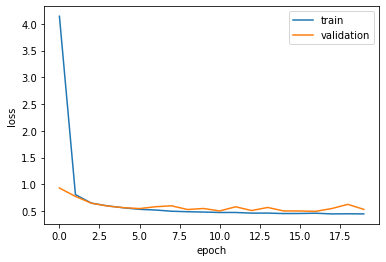

In [21]:
# 검증세트의 손실값이 대략 Epoch 1부터 증가하는 것으로 보아 전형적인 과대적합 모델이 만들어지는 것으로 해석할 수 있다.

# 과대적합을 막기 위해, 규제 방식 대신, 신경망에 특화된 규제 방법을 다음장에서 배워보자.
# 일단 여기서는 옵티마이저 하이퍼파라미터를 조절해서 과대적합을 완화시킬 수 있는지 알아본다.

# 기본 RMSprop 옵티마이저는 많은 문제에서 잘 동작한다.
# 만약 이 옵티마이저 대신 다른 옵티마이저를 선택한다면 Adam 이 좋은 선택이다.
# Adam 은 적응적 학습률을 사용하기 때문에, 에포크가 진행되면서 학습률의 크기를 조정할 수 있다.
# Adam 옵티마이저를 적용해보고 훈련 손실과 검증 손실을 다시 그려보자.

model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
# 디폴트 옵티마이저인 RMSprop 보다 Adam 옵티마이저가 이 데이터 셋의 훈련에 더 적합한 것을 알 수 있다.
# 검증 세트에 대한 손실값이 안정적으로 에포크가 반복되더라도 수렴하는 것을 확인할 수 있다.

# 옵티마이저 외에 학습률의 조정으로도 다시 시도해볼 수 있으나, 아래에서 바로 신경망에서 사용하는
# 대표적인 규제 방법을 배워보자.

# 드롭아웃

> 드롭아웃(dropout)은 딥러닝의 아버지라고 불리는 제프리 힌턴이 소개했다.

> 이 방식은 훈련 과정에서 랜덤하게 은닉층에 있는 일부 뉴런의 출력을 0 (끈다)으로 만들어 뒷 단 레이어에 영향을 미치지 않게 하는 방식이다.

> '얼마나 많은 뉴런을 드롭아웃 할 것인가?' 같은 하이퍼파라미터가 존재하며, 드롭아웃을 통해 훈련데이터로 모델 파라미터 학습 과정에서 모델의 성능이 특정 뉴런에 과도하게 의존하는 결과를 초래하지 않을 수 있다.

> 매 에포크에서 드롭아웃이 적용되는 뉴런이 달라지기 때문에, 과대적합을 막는 것 외에도 모든 에포크에 대해 드롭아웃이 적용된 각 인공신경망들의 앙상블 하는 것으로도 생각할 수 있다.

In [22]:
# 케라스에서는 드롭아웃을 keras.layers 패키지 아래 Dropout 클래스로 제공한다.
# 어떤 층 뒤에 드롭아웃을 두어 이 층의 출력을 랜덤하게 0으로 만들 수 있다.
# Flatten 처럼 층으로 활용되지만, 훈련되는 모델 파라미터는 동일하게 없다.

# 뉴런의 30% 정도만 드롭아웃하는 신경망을 만들어보자.
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_15 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


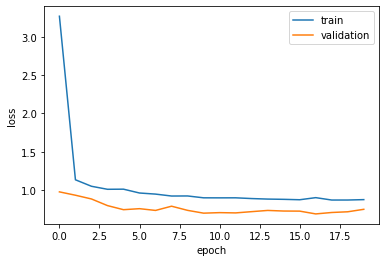

In [24]:
# model_fn 함수에서 전달되는 인자가 있으면 히든레이어 뒤에 해당 레이어를 추가하도록 해놨기 때문에, 히든레이어 바로 뒤에 Dropout층이 추가된 걸 알 수 있다.
# 드롭아웃을 적용할 때 유의할 점은, 훈련과정에만 적용하여야 하며, 평가나 예측을 수행할 때에는 드롭아웃을 적용하지 말아야 한다.

# 다행히도 tensorflow, keras는 모델을 평가와 예측할 때에는 신경망에서 드롭아웃층을 따로 빼지 않더라도 자동으로 드롭아웃을 적용하지 않는다.
# 훈련, 검증 손실을 시각화 해보자.

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')
history = model.fit(train_scaled, train_target, verbose=0, epochs=20, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [27]:
# 드롭아웃 적용 후, 훈련세트의 손실값이 조금 더 큰 것으로 보아 과대적합이 억제된 것을 알 수 있다.

# 이번에는 '모델 저장'과 '모델 복원'을 해보자.
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, validation_data=(val_scaled, val_target), verbose=0, epochs=10)

# 케라스 모델은 훈련된 "모델의 파라미터를 저장하는 간편한 'save_weights()' 메서드"를 제공한다.
# 기본적으로 이 메서드는 텐서플로의 체크포인트 포맷으로 저장하지만, 파일의 확장자가 '.h5'일 경우, HDF5 포맷으로 저장한다.
model.save_weights('model-weights.h5')

# 모델의 파라미터 뿐 아니라 모델의 구조까지 저장하는 save() 메서드도 있다.
# 기본적으로 이 메서드는 tensorflow의 SavedModel 포맷으로 저장하지만, 파일의 확장자가 '.h5'일 경우 HDF5 포맷으로 저장한다.
model.save('model-whole.h5')

!ls -al *.h5

-rw-r--r-- 1 root root 333448 Sep  9 11:52 model-weights.h5
-rw-r--r-- 1 root root 982664 Sep  9 11:52 model-whole.h5


In [29]:
# 두 가지 실험을 해보자
# 1. 훈련하지 않은 새로운 모델을 만들고 model-weights.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용한다.
# 2. 아예 model-whole.h5 파일에서 새로운 모델을 만들어 바로 사용한다.

# 1. 모델 파라미터를 읽어서 검증 세트의 성능 측정하기.
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

# 검증 정확도를 확인해보자.
# predict() 는 샘플마다 10개 클래스에 대한 확률을 반환한다.
# fashion mnish 데이터셋에서 덜어낸 검증 세트가 12000개 샘플이므로, 그 결과는 (12000, 10)이 된다.

import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
# 2차원 (12000, 10)에 대해 axis=-1 은 마지막 차원인 axis=1 과 같다. 즉, 각 행에대해 가장 큰 값을 갖는 열의 인덱스를 추출한다.
print(np.mean(val_labels == val_target))
# 타겟과 모델이 가장 높은 확률로 예측한 샘플들에 대한 추론을 비교하여 평균내어 검증세트의 정확도를 측정한다.


# 2. 모델 전체 파일에서 읽어서 검증 세트의 정확도를 측정하기.
# 새로운 함수 keras.models.load_model() 메서드를 사용한다.
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

0.7013333333333334
375/375 [==============================] - 1s 1ms/step - loss: 0.7673 - accuracy: 0.7013


[0.7673199772834778, 0.7013333439826965]

In [31]:
# 이 과정을 다시 생각해보면, 20번의 에포크 동안 검증 손실이 상승하는 지점을 확인한 뒤,
# 모델이 과대적합 되지 않는 에포크만큼 다시 훈련했다.
# 이렇게 두 번 훈련하지 않고 한번에 끝낼 수는 없을까?

# 이제 콜백을 사용해보자.

# 콜백(Callback)은 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체다.
# keras.callbacks 패키지 아래에 있는 클래스들이 있다.
# fit() 메서드의 callbacks 매개변수에 리스트로 전달해서 사용한다.

model = model_fn(keras.layers.Dropout(0.3))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')

# 최상의 검증점수를 만드는 모델을 저장한다.
# 저장될 파일 이름은 'best-model.h5' 로 지정해서 콜백을 적용해보자.
checkpoint_callback = keras.callbacks.ModelCheckpoint('best-model.h5')

model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_callback])

# 모델이 훈련된 뒤에 best-model.h5 에 최상의 검증 점수를 낸 모델이 저장된다.
# 이 모델을 load_model() 함수로 다시 읽어서 예측해보자.
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.7210 - accuracy: 0.7187


[0.720970869064331, 0.718666672706604]

In [33]:
# ModelCheckpoint 콜백이 가장 낮은 손실값을 갖는 검증점수의 모델을 자동으로 저장해주었다.
# 하지만 여전히 20번의 에포크동안 훈련을 했다.

# 검증 점수가 상승하기 시작하면 그 이후에는 과대적합이 더 커지기 때문에, 훈련을 계속할 필요가 없다.
# 이 때 훈련을 중지하면 컴퓨터 자원과 시간을 아낄 수 있다. 이렇게 과대적합이 시작되기 전에 훈련을 미리 중지하는 것을 '조기종료'라고 하며,
# 널리 사용된다.

# 조기 종료는 훈련 에포크 수를 제한하여 모델이 과대적합되지 않도록 막아주기 때문에 규제 방법 중 하나라고 생각할 수 있다.

# 케라스에서는 조기종료를 위한 'EarlyStopping' 콜백을 제공한다.
# 이 콜백의 'patience' 매개변수는 검증 손실값이 낮아지지 않더라도 훈련을 계속할 에포크 횟수로 지정한다.
# 'restore_best_weights' 매개변수가 True가 되면 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌린다.

# 종합하면, EarlyStopping, ModelCheckpoint 콜백을 동시에 사용하면, 가장 낮은 검증 손실의 모델을 파일에 저장하고 (ModelCheckpoint),
# 검증 손실이 다시 상승할 때 훈련을 중지할 수 있다. (EarlyStopping)

model = model_fn(keras.layers.Dropout(0.3))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

In [34]:
# fit() 에서 callbacks 매개변수 인자로 두 개의 콜백들을 리스트로 전달한 것을 볼 수 있다.
# 훈련을 마치고나서, 몇 번째 에포크에서 훈련이 중지되었는지 early_stopping_cb 객체의 'stopped_epoch' 속성에서 확인할 수 있다.
print(early_stopping_cb.stopped_epoch)

8


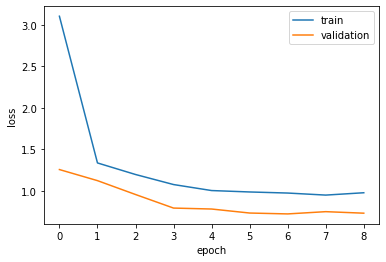

In [35]:
# 결과가 8이므로 9번째 에포크에서 훈련이 중지되었다. (1부터 카운팅일경우임)
# patience가 2였으므로, 최상의 모델은 7번째 ([6]) 에포크일 것이다.

# 훈련 손실과 검증 손실을 시각화해보자
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [36]:
# 예상대로 [6] 에포크에서 검증 손실이 가장 낮았다.
# 이렇게, 조기종료 기법을 사용하면, 안심하고 에포크 횟수를 크게 지정해도 상관없다.
# 또한, 컴퓨터 자원과 시간을 아낄 수 있고, ModelCheckpoint 콜백과 함께 사용하면 최상의 모델을 자동으로 저장해주므로 편리하다.

# 조기종료로 얻은 모델을 사용해 검증 세트에 대한 성능을 확인해보자.
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.7231 - accuracy: 0.7236


[0.7231460213661194, 0.7235833406448364]